In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train=pd.read_csv("train.csv")
train

In [ ]:
test=pd.read_csv("test.csv")
test

#Data Preprocessing

In [ ]:
train.replace({'Gender':{'M':0,'F':1}},inplace=True)
train.replace({'Income Stability':{'Low':0,'High':1}},inplace=True)
train.replace({'Profession':{'Working':0,'Commercial associate':1,'Pensioner':2,'State servant':3,'Unemployed':4,'Businessman':5,
                             'Student':6,'Maternity leave':7}},inplace=True)
train.replace({'Type of Employment':{'Laborers':0,'Sales staff':1,'Core staff':2,'Managers':3,'Drivers':4,'Accountants':5,'High skill tech staff':6,
                                     'Medicine staff':7,'Security staff':8,'Cooking staff':9,'Private service staff':10,'Cleaning staff':11,'Low-skill Laborers':12,
                                     'Secretaries':13,'Waiters/barmen staff':14,'Realty agents':15,'IT staff':16,'HR staff':17}},inplace=True)
train.replace({'Location':{'Semi-Urban':0,'Rural':1,'Urban':2}},inplace=True)
train.replace({'Property Location':{'Semi-Urban':0,'Rural':1,'Urban':2}},inplace=True)
train.replace({'Expense Type 1':{'N':0,'Y':1}},inplace=True)
train.replace({'Expense Type 2':{'N':0,'Y':1}},inplace=True)
train.replace({'Has Active Credit Card':{'Active':0,'Inactive':1,'Unpossessed':2}},inplace=True)

In [ ]:
import math
train['Income (USD)']=train['Income (USD)'].fillna(math.floor(train['Income (USD)'].median()))
train['Current Loan Expenses (USD)']=train['Current Loan Expenses (USD)'].fillna(math.floor(train['Current Loan Expenses (USD)'].mean()))
train['Credit Score']=train['Credit Score'].fillna(math.floor(train['Credit Score'].mean()))
train['Property Age']=train['Property Age'].fillna(math.floor(train['Property Age'].mean()))
train['Gender']=train['Gender'].fillna(math.floor(train['Gender'].median()))
train['Income Stability']=train['Income Stability'].fillna(math.floor(train['Income Stability'].median()))
train['Dependents']=train['Dependents'].fillna(math.floor(train['Dependents'].median()))
train['Has Active Credit Card']=train['Has Active Credit Card'].fillna(math.floor(train['Has Active Credit Card'].median()))
train['Property Location']=train['Property Location'].fillna(math.floor(train['Property Location'].median()))
train['Gender']=train['Gender'].fillna(math.floor(train['Gender'].median()))
train['Type of Employment']=train['Type of Employment'].fillna(math.floor(train['Type of Employment'].median()))


In [ ]:
x=train['Loan Sanction Amount (USD)']
del train['Loan Sanction Amount (USD)']
x=x.fillna(math.floor(x.mean()))

In [ ]:
y=train.copy()
del y['Customer ID']
del y['Name']

# linear regression model

In [ ]:
reg=linear_model.LinearRegression()
reg.fit(y,x)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predtrain=reg.predict(y)

# Score

In [ ]:
error=metrics.r2_score(x,predtrain)
score=max(0,100*error)
score

57.94193792679142

# Test Data

In [ ]:
test.replace({'?':0},inplace=True)
test.replace({'Gender':{'M':0,'F':1}},inplace=True)
test.replace({'Income Stability':{'Low':0,'High':1}},inplace=True)
test.replace({'Profession':{'Working':0,'Commercial associate':1,'Pensioner':2,'State servant':3,'Unemployed':4,'Businessman':5,
                             'Student':6,'Maternity leave':7}},inplace=True)
test.replace({'Type of Employment':{'Laborers':0,'Sales staff':1,'Core staff':2,'Managers':3,'Drivers':4,'Accountants':5,'High skill tech staff':6,
                                     'Medicine staff':7,'Security staff':8,'Cooking staff':9,'Private service staff':10,'Cleaning staff':11,'Low-skill Laborers':12,
                                     'Secretaries':13,'Waiters/barmen staff':14,'Realty agents':15,'IT staff':16,'HR staff':17}},inplace=True)
test.replace({'Location':{'Semi-Urban':0,'Rural':1,'Urban':2}},inplace=True)
test.replace({'Property Location':{'Semi-Urban':0,'Rural':1,'Urban':2}},inplace=True)
test.replace({'Expense Type 1':{'N':0,'Y':1}},inplace=True)
test.replace({'Expense Type 2':{'N':0,'Y':1}},inplace=True)
test.replace({'Has Active Credit Card':{'Active':0,'Inactive':1,'Unpossessed':2}},inplace=True)
import math
test['Income (USD)']=test['Income (USD)'].fillna(math.floor(test['Income (USD)'].median()))
test['Current Loan Expenses (USD)']=test['Current Loan Expenses (USD)'].fillna(math.floor(test['Current Loan Expenses (USD)'].mean()))
test['Credit Score']=test['Credit Score'].fillna(math.floor(test['Credit Score'].mean()))
test['Property Age']=test['Property Age'].fillna(math.floor(test['Property Age'].mean()))
test['Gender']=test['Gender'].fillna(math.floor(test['Gender'].median()))
test['Income Stability']=test['Income Stability'].fillna(math.floor(test['Income Stability'].median()))
test['Dependents']=test['Dependents'].fillna(math.floor(test['Dependents'].median()))
test['Has Active Credit Card']=test['Has Active Credit Card'].fillna(math.floor(test['Has Active Credit Card'].median()))
test['Property Location']=test['Property Location'].fillna(math.floor(test['Property Location'].median()))
test['Gender']=test['Gender'].fillna(math.floor(test['Gender'].median()))
test['Type of Employment']=test['Type of Employment'].fillna(math.floor(test['Type of Employment'].median()))



In [ ]:

ytest=test.copy()

del ytest['Customer ID']
del ytest['Name']

In [ ]:
for i in range(len(ytest['Property Price'])):
  ytest['Property Price'][i] = float(ytest['Property Price'][i])

In [ ]:
pred=reg.predict(ytest)

In [ ]:
outArr=[]
for i in range(len(test)):
  temp=[]
  temp.append(test['Customer ID'][i])
  temp.append(pred[i])
  outArr.append(temp)

# Import Predicted test Data into CSV

In [ ]:
import csv
headerList = ['Customer ID','Loan Sanction Amount (USD)']

with open('predInTest.csv', 'w', newline='') as file:
      writer = csv.DictWriter(file, delimiter=',', 
                        fieldnames=headerList)
      writer = csv.writer(file)
      writer.writerow(headerList)
      writer.writerows(outArr)
files.download('predInTest.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

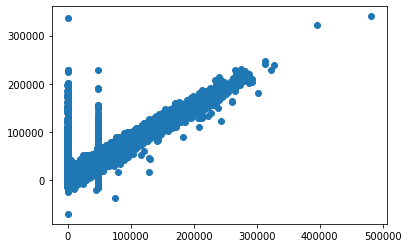

In [ ]:
plt.scatter(x,predtrain)
plt.show()